In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

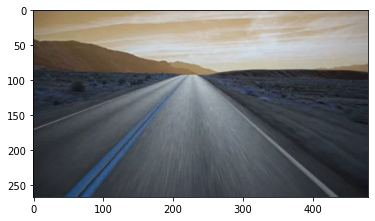

In [2]:
img=cv2.imread("r4.jpg")
plt.imshow(img)


In [3]:
cv2.imshow('frame',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

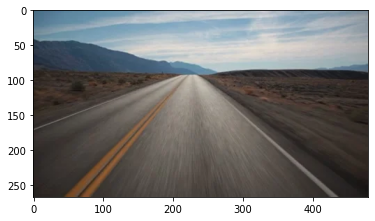

In [8]:
#to rgb
rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(rgb)

In [5]:
#to greyscale
grey = cv2.cvtColor(rgb,cv2.COLOR_BGR2GRAY)
#plt.imshow(grey)
#plt.show()

In [6]:
blur = cv2.GaussianBlur(grey,(5,5),sigmaX=0,sigmaY=None)
#plt.imshow(blur,cmap='gray')
#plt.title('GaussianBlur')
#plt.show()

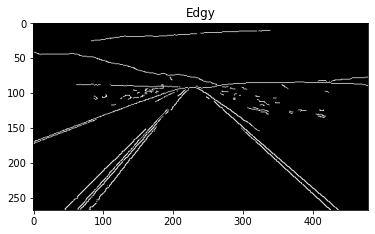

In [17]:
#using Canny
edges = cv2.Canny(img,100,150)
plt.imshow(edges,cmap='gray')
plt.title('Edgy')
plt.show()

In [8]:
edges.shape

(268, 480)

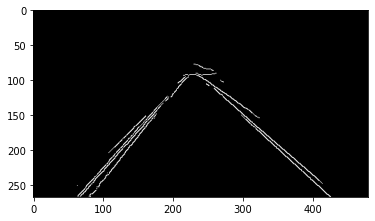

In [21]:
def region(image):
    height, width = image.shape
    triangle = np.array([
                       #[(0, height), (240, 100), (480, height)]
                       [(int(width/10), height), (int(width/2), int(height*0.25)), (int(width/10*9), height)]
                       ])
    
    mask = np.zeros_like(image)
    mask = cv2.fillPoly(mask, triangle, 255)
    #plt.imshow(mask,cmap='gray')
    #plt.show()
    mask = cv2.bitwise_and(image, mask)
    return mask

#plt.imshow(edges,cmap='gray')
#plt.show()
isolated = region(edges)
plt.imshow(isolated,cmap='gray')
plt.show()


In [10]:
lines = cv2.HoughLinesP(isolated, 2, np.pi/180, 100, np.array([]), minLineLength=40, maxLineGap=5)

In [11]:
orig_copy = np.copy(rgb)
#plt.imshow(orig_copy)
#plt.show()

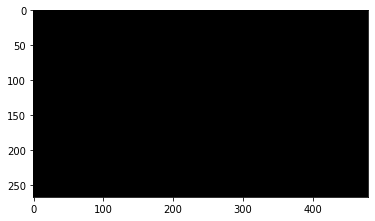

In [18]:
lined_image=np.zeros_like(orig_copy)
plt.imshow(lined_image)
plt.show()

In [13]:
def lined(image,lines):
    lined_image=np.zeros_like(image) #just full black image of original image
    if lines is not None:  #if lines found at all
        for line in lines:
            x1,y1,x2,y2=line.reshape(4) #changes 2d[[]] array to 1d []
            cv2.line(lined_image,(x1,y1),(x2,y2),(255,0,0),10)  #drawing lines found by HTrans onto black img
    return lined_image 
black_lines = lined(orig_copy,lines)
#plt.imshow(black_lines)
#plt.show()

### GOT LINES, NOW PUT ON ORIGINAL IMG

In [14]:
added = cv2.addWeighted(rgb,0.8,black_lines,1,1)
#plt.imshow(added)
#plt.show()

### REALSHIT

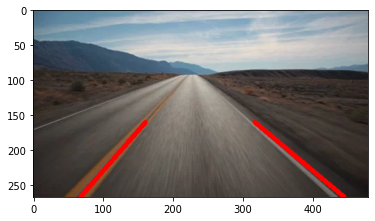

In [15]:
def averager(lane_img,lines):
    left = []
    right =[]
    for line in lines:      
        x1,y1,x2,y2 = line.reshape(4)         #polyfit takes coords of a line and returns m and c
        param = np.polyfit((x1,x2),(y1,y2),1) #m at 0 c at 1 
        m = param[0]
        c = param[1]

        if(m<0):
            left.append((m,c))
        else:
            right.append((m,c))

    l_avg = np.average(left,axis=0)  #list of 2 elements
    r_avg = np.average(right,axis=0)

    left_line = coordinator(l_avg,lane_img)
    right_line = coordinator(r_avg,lane_img)
    
    cv2.line(lane_img,(left_line[0],left_line[1]),(left_line[2],left_line[3]),(255,0,0),5)
    cv2.line(lane_img,(right_line[0],right_line[1]),(right_line[2],right_line[3]),(255,0,0),5)
    return lane_img




def coordinator(line_params,img):
    m = line_params[0]
    c = line_params[1]
    y1 = img.shape[0]
    y2 = int(3/5*y1)
    x1 = int((y1-c)/m)
    x2 = int((y2-c)/m)
    
    l = [x1,y1,x2,y2]
    return l



frame = averager(orig_copy,lines)
plt.imshow(frame)
plt.show()


In [16]:
img.shape

(268, 480, 3)

### USING VIDEO

In [17]:
cap = cv2.VideoCapture("r5.mp4")
while(cap.isOpened):
    ret,frame = cap.read()
    if ret==True:
        cv2.imshow('Frame',frame)
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break
    else:
        break

cap.release()
cv2.destroyAllWindows()

